Lab 1 – Tỷ lệ hủy đặt phòng
Yêu cầu: Tính tỷ lệ hủy đặt phòng (is_canceled) cho từng năm (2018, 2019, 2020).
Gợi ý: Đếm số đặt phòng bị hủy / tổng số đặt phòng.

In [1]:
import pandas as pd 
hotel_revenue = pd.read_excel("hotel_revenue_historical_full.xlsx", engine= "openpyxl", sheet_name= None)
hotel_revenue.keys()

dict_keys(['2018', '2019', '2020', 'meal_cost', 'market_segment', 'Practices'])

In [2]:
# Kiểm tra các kiểu dữ liệu của từng cột
for sheet, df in hotel_revenue.items():
    print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [3]:
# Chuyển kiểu cột "children" thành int 
for sheet, df in hotel_revenue.items():
    if "children" in df.columns:
        df["children"] = df["children"].fillna(0).astype(int)
        hotel_revenue[sheet] = df
# Kiểm tra đã chuyển kiểu hay chưa    
    print(df.dtypes)

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [4]:
# Kiểm tra đã đọc đủ tất cả sheet hay chưa
for sheet, df in hotel_revenue.items():
    print(sheet)
    print(df.columns)

2018
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
2019
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country'

In [5]:
for year, df in hotel_revenue.items():
    if year in ["2018", "2019", "2020"]:
        # Tính tổng các booking bị hủy và tổng số booking
        total_canceled = df["is_canceled"].sum()
        total_booking = len(df)
        # Tính tỉ lệ hủy đặt phòng
        cancel_rate = total_canceled / total_booking
        print(f"Tỷ lệ hủy đặt phòng năm {year}: {cancel_rate:.2%}")


Tỷ lệ hủy đặt phòng năm 2018: 37.02%
Tỷ lệ hủy đặt phòng năm 2019: 36.53%
Tỷ lệ hủy đặt phòng năm 2020: 38.70%


Lab 2 – Doanh thu trung bình theo khách sạn
Yêu cầu: Tính ADR trung bình (adr) của City Hotel và Resort Hotel trong từng năm.
So sánh khách sạn nào mang lại giá trị cao hơn.

In [6]:
for year, df in hotel_revenue.items():
    if year in ["2018","2019", "2020"]:
        # Tách data của City Hotel
        city_df = df[df["hotel"] == "City Hotel"]
        city_adr = city_df["adr"].mean()
        # Tách data của Resort Hotel 
        resort_df = df[df["hotel"] == "Resort Hotel"]
        resort_adr = resort_df["adr"].mean()
        
        print(f"Năm: {year}")
        print(f"ADR của City Hotel là: {city_adr:.2f}")
        print(f"ADR của Resort Hotel là: {resort_adr:.2f}")

        # So sánh cả hai 
        if (city_adr > resort_adr):
            print("City Hotel mang lại giá trị cao hơn Resort Hotel")
        elif (city_adr == resort_adr): 
            print("City Hotel và Resort Hotel mang lại giá trị như nhau")
        else:
            print("Resort Hotel mang lại giá trị cao hơn City Hotel") 
               

Năm: 2018
ADR của City Hotel là: 85.86
ADR của Resort Hotel là: 89.35
Resort Hotel mang lại giá trị cao hơn City Hotel
Năm: 2019
ADR của City Hotel là: 98.82
ADR của Resort Hotel là: 87.75
City Hotel mang lại giá trị cao hơn Resort Hotel
Năm: 2020
ADR của City Hotel là: 117.50
ADR của Resort Hotel là: 108.66
City Hotel mang lại giá trị cao hơn Resort Hotel


Lab 3 – Lead time
Yêu cầu: Tính lead_time trung bình cho các booking bị hủy vs không hủy.
Nhận xét: Lead_time dài có làm tăng khả năng hủy đặt phòng không?

In [7]:
# Tổng hợp dữ liệu của 3 năm: 2018, 2019,2020
df_total_year = []

# Sử dụng concat để tổng hợp dữ liệu của 3 năm
for year, df in hotel_revenue.items():
    if year in ["2018", "2019", "2020"]:
        df_total_year.append(df)

df_total = pd.concat(df_total_year)

# Tính lead time trung bình
lead_time_cancel = df_total[df_total["is_canceled"] == 1]["lead_time"].mean()
lead_time_not = df_total[df_total["is_canceled"] == 0]["lead_time"].mean()

print(f"Lead time trung bình cho các booking bị hủy là : {lead_time_cancel:.2f}")
print(f"Lead time trung bình cho các booking không bị hủy là : {lead_time_not:.2f}")

# Nhận xét
if (lead_time_cancel > lead_time_not):
    print("\nLead time dài làm tăng khả năng hủy đặt phòng")
else:
    print("\nLead time dài không làm tăng khả năng hủy đặt phòng ")


Lead time trung bình cho các booking bị hủy là : 146.55
Lead time trung bình cho các booking không bị hủy là : 76.89

Lead time dài làm tăng khả năng hủy đặt phòng


Lab 4 – Doanh thu theo kênh bán hàng
Yêu cầu: Ghép dữ liệu với sheet market_segment.
Tính doanh thu trung bình (ADR × số đêm ở × (1 - discount)) cho từng market_segment.

In [8]:
# Ghép dữ liệu với sheet market_segment
df_market = hotel_revenue["market_segment"]
df_merge_market = pd.merge(df_total, df_market, on= "market_segment", how= "left")

# Tạo thêm cột chứa số đêm ở và số doanh thu 
df_merge_market["stay_night_total"] = (
    df_merge_market["stays_in_week_nights"] + df_merge_market["stays_in_weekend_nights"])
df_merge_market["revenue"] = (
    df_merge_market["adr"] * df_merge_market["stay_night_total"] * (1 - df_merge_market["Discount"]))

# Tính doanh thu trung bình của từng market segment
df_mean_renevue = df_merge_market.groupby("market_segment")["revenue"].mean().reset_index()

print("Doanh thu trung bình là: ")
print(df_mean_renevue)


Doanh thu trung bình là: 
  market_segment     revenue
0       Aviation  295.177586
1  Complementary    0.000000
2      Corporate  126.720774
3         Direct  365.404751
4         Groups  207.921811
5  Offline TA/TO  231.397741
6      Online TA  294.739007
7      Undefined   24.000000


Lab 5 – Meal plan
Yêu cầu: Ghép dữ liệu với sheet meal_cost.
Tính chi phí ăn uống trung bình cho mỗi loại meal.
Xem loại meal nào được chọn nhiều nhất.

In [9]:
# Ghép dữ liệu với sheet meal_cost 
df_meal_cost = hotel_revenue["meal_cost"]
df_merge_meal = pd.merge(df_total, df_meal_cost, how= "outer")

# Tính chi phí ăn uống trung bình cho mỗi loại meal 
df_cost_mean = df_merge_meal.groupby("meal")["Cost"].mean().reset_index()

print("Chi phí ăn uống trung bình cho mỗi loại meal là: ")
print(df_cost_mean)

# Nhận xét loại meal nào được chọn nhiều nhất
most_meal = df_merge_meal["meal"].value_counts().idxmax()
print(f"\nLoại meal được chọn nhiều nhất là: {most_meal}")

Chi phí ăn uống trung bình cho mỗi loại meal là: 
        meal   Cost
0         BB  12.99
1         FB  21.99
2         HB  17.99
3         SC  35.00
4  Undefined   0.00

Loại meal được chọn nhiều nhất là: BB


Lab 6 – Phân bổ theo tháng
Yêu cầu: Vẽ biểu đồ số lượng booking theo arrival_date_month cho từng năm.
Nhận xét: Mùa cao điểm du lịch là tháng nào?

In [10]:
import matplotlib.pyplot as plt 

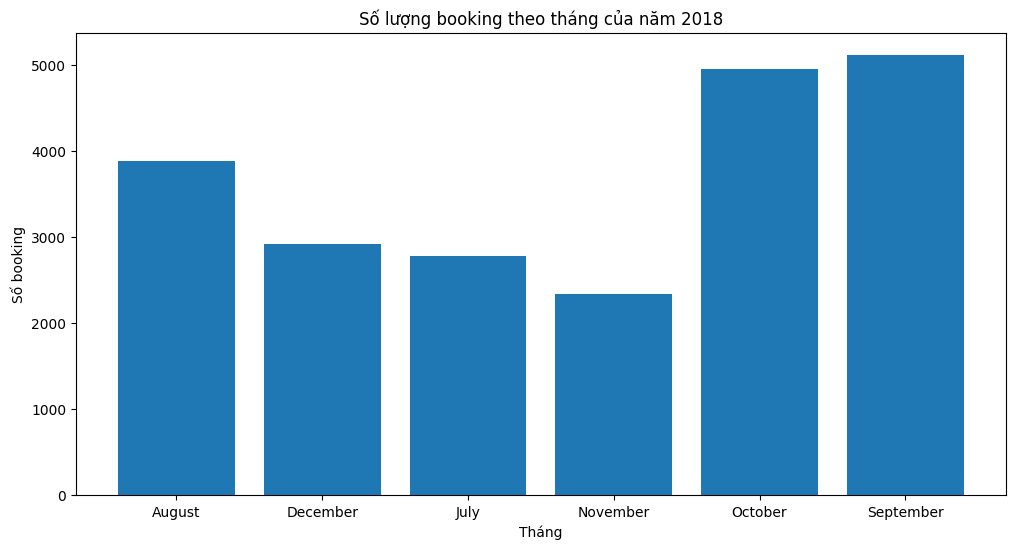

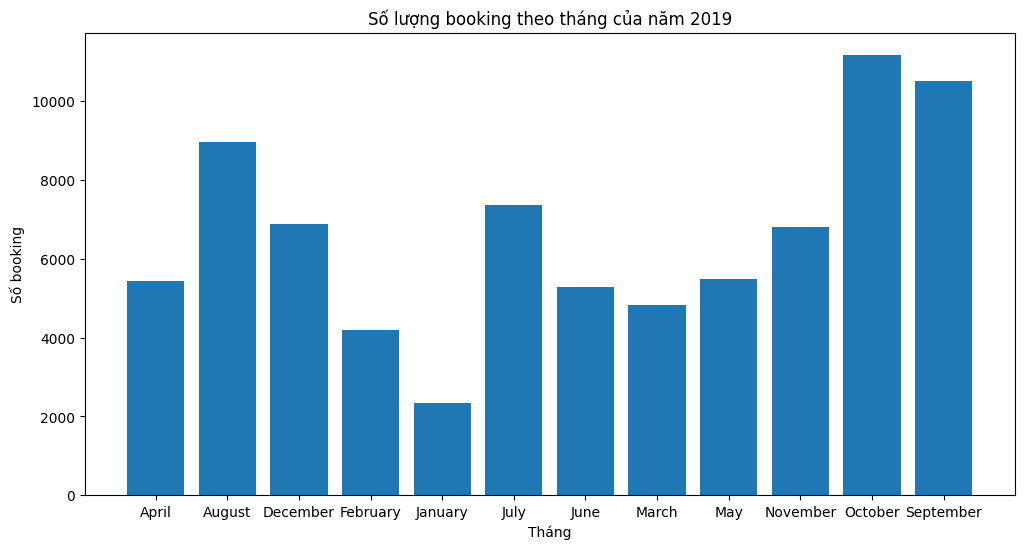

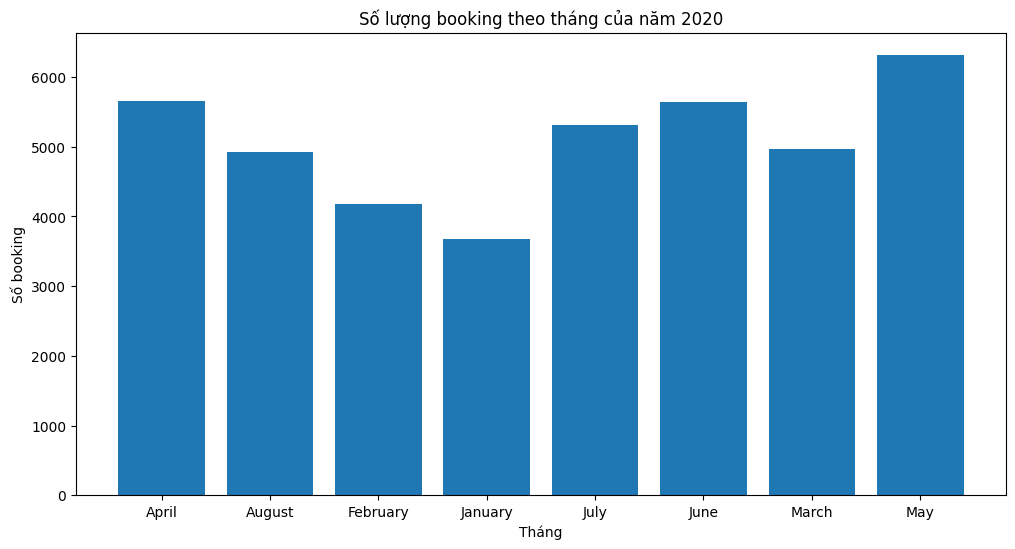

In [11]:
# Tính tổng số booking của mỗi năm
booking_total = df_total.groupby(["arrival_date_year", "arrival_date_month"]).size().reset_index(name= "total_booking")
years = booking_total["arrival_date_year"].unique()

# Vẽ biểu đồ cột cho từng năm 
for year in years: 
    df_year = booking_total[booking_total["arrival_date_year"] == year]

# Thiết lập title, lable cho từng trục của biểu đồ
    plt.figure(figsize= (12, 6))
    plt.bar(df_year["arrival_date_month"], df_year["total_booking"])
    plt.title(f"Số lượng booking theo tháng của năm {year}")
    plt.xlabel("Tháng")
    plt.ylabel("Số booking")


Nhận xét: 
Trong năm 2018 - 2019, mùa cao điểm thường rơi vào tháng 7 tháng 8 và cao nhất là tháng 9 và tháng 10.
Năm 2020, các tháng đều có lượng booking ngang nhau và không còn rơi vào các tháng cao điểm các năm trước đó (năm 2018, 2019), có thể do dịch bệnh làm giảm/thay đổi thói quen du lịch đi lại.
Điểm chung của 3 năm là hầu như vào các tháng 1, tháng 2 đầu năm lượng booking sẽ không nhiều hoặc không có.

Lab 7 – Kiểm tra giá trị thiếu (NaN)
Yêu cầu: Đếm số lượng giá trị NaN trong từng cột (ví dụ agent, company).
Hãy đề xuất cách xử lý (xóa, thay bằng giá trị mặc định, hay giữ nguyên).

In [12]:
# Kiểm tra các mục có % giá trị NaN
df_total.isna().sum() * 100 / len(df_total)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.440305
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [13]:
def count_nan(df, nan_col, fill_col, del_col, value=-1):
    # Đếm NaN trước khi fill
    nan_count_bf = df[nan_col].isna().sum()

    # Fill các giá trị mặc định trên các cột cần xử lý
    df[fill_col] = df[fill_col].fillna(value)

    # Đếm NaN sau khi fill
    nan_count_af = df[nan_col].isna().sum()

    # Xóa cột company
    df = df.drop(del_col, axis= 1)

    return nan_count_bf, nan_count_af, df

nan_col = ["agent", "country", "children", "company"]
fill_col = ["agent", "country", "children"]
del_col = "company"

df_bf, df_af, df_total = count_nan(df_total, nan_col, fill_col, del_col)

print("Số lượng các giá trị NaN trước khi fill:")
print(df_bf)
print("\nSố lượng các giá trị NaN sau khi fill:")
print(df_af)
print(f"\nSố cột còn lại sau khi drop {del_col}: ")
print(df_total.columns)

Số lượng các giá trị NaN trước khi fill:
agent        19555
country        625
children         0
company     133822
dtype: int64

Số lượng các giá trị NaN sau khi fill:
agent            0
country          0
children         0
company     133822
dtype: int64

Số cột còn lại sau khi drop company: 
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='obje

Lab 8 – Chuẩn hóa ngày tháng
Yêu cầu: Ghép các cột arrival_date_year, arrival_date_month, arrival_date_day_of_month thành một cột arrival_date dạng datetime.
Kiểm tra có giá trị nào không hợp lệ không.

In [14]:
# Ghép các cột thành một cột arrival_date dạng datetime
df_total["arrival_date"] = pd.to_datetime(
    df_total["arrival_date_year"].astype(str) + "-" + 
    df_total["arrival_date_month"].astype(str) + "-" + 
    df_total["arrival_date_day_of_month"].astype(str), errors= "coerce")

# Drop 3 cột đã được ghép
df_total = df_total.drop(["arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"], axis= 1)

# Kiểm tra các giá trị không hợp lệ
invalid_values = df_total["arrival_date"].isna().sum()
print(f"Số lượng các giá trị không hợp lệ: {invalid_values}")

# Kiểm tra dữ liệu sau khi ghép
print(df_total.head(5))

Số lượng các giá trị không hợp lệ: 0
          hotel  is_canceled  lead_time  arrival_date_week_number  \
0  Resort Hotel            1         85                        27   
1  Resort Hotel            1         75                        27   
2  Resort Hotel            1         23                        27   
3  Resort Hotel            1         60                        27   
4  Resort Hotel            1         96                        27   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     3       2         0       0   
1                        0                     3       2         0       0   
2                        0                     4       2         0       0   
3                        2                     5       2         0       0   
4                        2                     8       2         0       0   

  meal  ... deposit_type  agent days_in_waiting_list  customer_type    adr  \
0

Lab 9 – Tạo biến mới
Yêu cầu: Tạo thêm cột total_nights = stays_in_weekend_nights + stays_in_week_nights.
Sau đó tính số booking có total_nights = 0 (đặt nhưng không ở).


In [15]:
# Tạo thêm cột total_nights
df_total["total_nights"] = (
    df_total["stays_in_weekend_nights"] + df_total["stays_in_week_nights"])

# Tính số booking có total_nights đặt nhưng không ở 
not_stay = (df_total["total_nights"] == 0).sum()
print(f"Số booking nhưng không ở: {not_stay}")


Số booking nhưng không ở: 871


Lab 10 – Xử lý dữ liệu không hợp lệ
Yêu cầu: Kiểm tra cột adr (Average Daily Rate).
Có giá trị nào âm hoặc bằng 0 không? Nếu có → xử lý thế nào?

In [16]:
# Tính số lượng giá trị âm
negative_values = (df_total["adr"] < 0).sum()
zero_values = (df_total["adr"] == 0).sum()
print(f"Số lượng giá trị ADR âm là: {negative_values}")
print(f"Số lượng giá trị ADR bằng 0 là: {zero_values}")

"""
    Vì chỉ có 1 giá trị âm nên có thể drop giá trị đó đi
    Nhưng các giá trị bằng 0 thì nhiều nên sẽ tạo 1 cột "is_zero" - đánh dấu những giá trị ADR bằng 0 

"""
# Drop giá trị âm
df_total = df_total[df_total["adr"] >= 0]

# Tạo một cột mới đánh dấu cho các giá trị bằng 0 
df_total["is_zero"] = (df_total["adr"] == 0).astype(int)

# Kiểm tra các cột bằng 0 đã được đánh dấu hay chưa
print(df_total[df_total["is_zero"] == 1].head())


Số lượng giá trị ADR âm là: 1
Số lượng giá trị ADR bằng 0 là: 2555
            hotel  is_canceled  lead_time  arrival_date_week_number  \
82   Resort Hotel            1         57                        29   
565  Resort Hotel            1        304                        36   
566  Resort Hotel            1        297                        36   
577  Resort Hotel            1        333                        36   
600  Resort Hotel            1        336                        37   

     stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
82                         0                     2       2         0       0   
565                        0                     3      40         0       0   
566                        1                     3       2         0       0   
577                        2                     5      26         0       0   
600                        1                     2      50         0       0   

    meal  ... days_in_wai

Lab 11 – Chuẩn hóa dữ liệu text
Yêu cầu: Kiểm tra cột meal và market_segment.
Có giá trị "Undefined" → thay bằng "Other".

In [17]:
# Đếm số giá trị Undefined 
print("Trước khi replace:")
print(f"meal: {(df_total["meal"] == "Undefined").sum()}")
print(f"market segment: {(df_total["market_segment"] == "Undefined").sum()}")

# Thay các giá trị "Undefined" bằng "Other"
df_total["meal"] = df_total["meal"].replace("Undefined", "Other")
df_total["market_segment"] = df_total["market_segment"].replace("Undefined", "Other")

# Các giá trị còn lại trong cột sau khi replace
print("\nSau khi replace:")
print(f"meal: {df_total["meal"].unique()}")
print(f"market segment: {df_total["market_segment"].unique()}")

Trước khi replace:
meal: 1372
market segment: 4

Sau khi replace:
meal: ['BB' 'HB' 'FB' 'Other' 'SC']
market segment: ['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Other' 'Aviation']
